In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

df_DA_IN_exploded = df_DA_IN.explode('job_skills')

df_DA_IN_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [3]:
df_DA_skills = df_DA_IN_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_IN)  

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


In [4]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

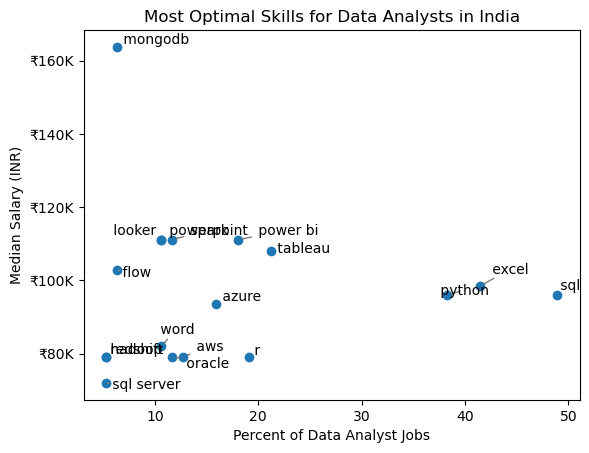

In [5]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'],
            df_DA_skills_high_demand['median_salary'])

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary (INR)')
plt.title('Most Optimal Skills for Data Analysts in India')


ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K'))


texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            " " + txt
        )
    )


adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()


In [ ]:
df_technology = df['job_type_skills'].copy()


df_technology = df_technology.drop_duplicates()


df_technology = df_technology.dropna()


technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  
    for key, value in row_dict.items():
        if key in technology_dict:  
            technology_dict[key] += value
        else:                       
            technology_dict[key] = value


for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['dax',
  'powerbi',
  'visio',
  'microstrategy',
  'sap',
  'excel',
  'nuix',
  'sheets',
  'powerpoint',
  'looker',
  'power bi',
  'splunk',
  'msaccess',
  'datarobot',
  'spreadsheet',
  'cognos',
  'ssrs',
  'word',
  'outlook',
  'sharepoint',
  'tableau',
  'sas',
  'spss',
  'ms access',
  'esquisse',
  'qlik',
  'alteryx',
  'ssis'],
 'programming': ['julia',
  'apl',
  'pascal',
  'shell',
  'lisp',
  'r',
  'scala',
  'rust',
  'cobol',
  'nosql',
  'mongo',
  'mongodb',
  'powershell',
  'lua',
  'golang',
  'java',
  'c',
  'css',
  'delphi',
  'visualbasic',
  'go',
  'haskell',
  'perl',
  'html',
  'clojure',
  'c#',
  'visual basic',
  'erlang',
  'sql',
  'vba',
  'elixir',
  'javascript',
  'python',
  'matlab',
  'ruby',
  'php',
  't-sql',
  'objective-c',
  'dart',
  'sas',
  'groovy',
  'assembly',
  'fortran',
  'c++',
  'no-sql',
  'solidity',
  'ocaml',
  'kotlin',
  'crystal',
  'vb.net',
  'f#',
  'swift',
  'sass',
  'bash',
  'typescr

In [7]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,dax
0,analyst_tools,powerbi
0,analyst_tools,visio
0,analyst_tools,microstrategy
0,analyst_tools,sap
...,...,...
9,sync,mattermost
9,sync,zoom
9,sync,twilio
9,sync,google chat


In [8]:
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.0,48.936170,programming,sql
1,39,98500.0,41.489362,analyst_tools,excel
2,36,96050.0,38.297872,programming,python
3,20,108087.5,21.276596,analyst_tools,tableau
4,18,79200.0,19.148936,programming,r
...,...,...,...,...,...
80,1,165000.0,1.063830,databases,postgresql
81,1,64600.0,1.063830,analyst_tools,ms access
82,1,165000.0,1.063830,databases,mysql
83,1,163782.0,1.063830,databases,neo4j


In [9]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

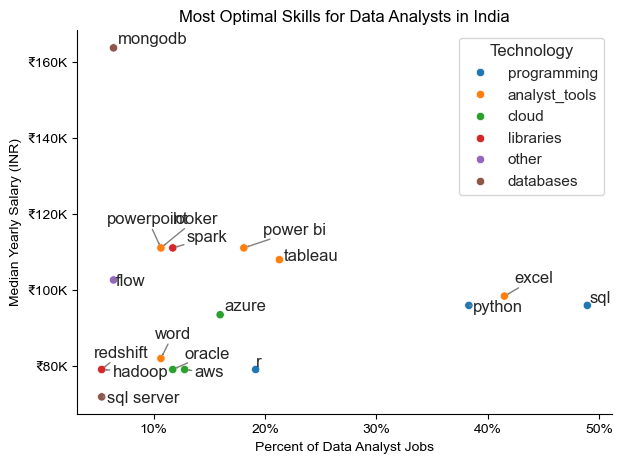

In [10]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(
        plt.text(
            df_DA_skills_high_demand['skill_percent'].iloc[i],
            df_DA_skills_high_demand['median_salary'].iloc[i],
            txt
        )
    )

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))


plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary (INR)')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.tight_layout()
plt.show()
